In [31]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 20

In [32]:
directory = "D:\\UoA\\Winter_2021\\CMPUT466\\MLOverflow\\rawdata"
answersPath = f"{directory}\Answers.csv"
questionsPath = f"{directory}\Questions.csv"
tagsPath = f"{directory}\Tags.csv"

In [33]:
answerdf = pd.read_csv(answersPath, encoding="ISO-8859-1")
questiondf = pd.read_csv(questionsPath, encoding="ISO-8859-1")
tagdf = pd.read_csv(tagsPath)


In [34]:
answerdf.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [35]:
questiondf.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [36]:
tagdf.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


# Tags

In [37]:
total = tagdf["Tag"].count()
uniques = tagdf["Tag"].nunique()
print("total tags: {} \t unique tags: {}".format(total, uniques))

total tags: 3749881 	 unique tags: 37034


In [38]:
tagdf["Tag"].value_counts(normalize=True)[:10]

javascript    0.033109
java          0.030724
c#            0.026984
php           0.026350
android       0.024177
jquery        0.020945
python        0.017227
html          0.015727
c++           0.012691
ios           0.012536
Name: Tag, dtype: float64

In [39]:
tagdf["Tag"].value_counts(normalize=False)[:10]

javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: Tag, dtype: int64

<class 'pandas.core.indexes.base.Index'>


<BarContainer object of 10 artists>

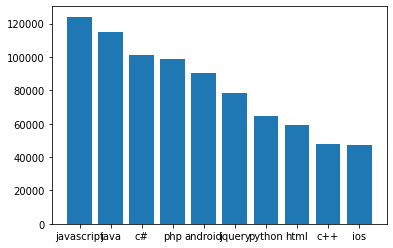

In [40]:
y = tagdf["Tag"].value_counts(normalize=False).values[:10]
x = tagdf["Tag"].value_counts(normalize=False).index[:10]
print(type(x))
plt.title="Title"
plt.bar(x,y)
# tagdf["Tag"].value_counts(normalize=False)[:10].plot(kind='bar')


In [41]:
tagCounts = tagdf["Tag"].value_counts(normalize=False)

In [42]:
tagCounts.where(tagCounts > 999)[:485]

javascript     124155.0
java           115212.0
c#             101186.0
php             98808.0
android         90659.0
                 ...   
phpmyadmin       1007.0
controller       1006.0
struts2          1004.0
asp-classic      1004.0
xsd              1001.0
Name: Tag, Length: 485, dtype: float64

In [43]:
answerdf.drop("OwnerUserId", axis=1, inplace=True)
questiondf.drop("OwnerUserId", axis=1, inplace=True)

In [45]:
answerdf.head()

,Id,CreationDate,ParentId,Score,Body
0,92,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [47]:
questiondf.head()

,Id,CreationDate,ClosedDate,Score,Title,Body
0,80,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [49]:
directory = "D:\\UoA\\Winter_2021\\CMPUT466\\MLOverflow\\lengthdata"
answersPath = f"{directory}\Answers.csv"
questionsPath = f"{directory}\Questions.csv"
tagsPath = f"{directory}\Tags.csv"


In [54]:
tagdf.to_csv(tagsPath, sep=',', index=False)
questiondf.to_csv(questionsPath, sep=',', index=False)
answerdf.to_csv(answersPath, sep=',', index=False)